In [4]:
# not sure where this is going

#### relating to the topic on realize and implied volatility

+  ^VIX (or in Tasty `/VX`) is defined to track the 1 month implied volatility (IV) - thus using weighted prices from option chain (front and back) that is near the 30 day-to-expiration.  Thus, you can always compute the 1-month, 2-month, 3-month IVs to track how market is predicting if volatility is going to expand/contract in the future.  Luckily, CBOE actual provides 2 indices for you to track and trade, VXX, VXZ.*  Where VXX tracks the "first and second month of VIX futures contracts", while VXZ tracks "the fourth, fifth, sixth and seventh month VIX futures contracts".

+ old video (aired 2013-04-30) on VIX vs VXX by Tom and Bat :) https://www.tastytrade.com/tt/learn/vxx
+ I have not much knowledge how VIX,VXX,VXN behaves. see above for views by expert trader/quants.

#### references

http://www.cboe.com/products/options-on-single-stocks-and-exchange-traded-products/options-on-exchange-traded-products/cboe-options-on-volatility-based-etps

https://www.ipathetn.com/US/16/en/details.app?instrumentId=341408

https://www.ipathetn.com/US/16/en/details.app?instrumentId=341615

In [5]:
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# get historical daily price for SPY and ^VIX
spy_history = yf.Ticker('SPY').history(period="max")
vix_history = yf.Ticker('^VIX').history(period="max")
vxx_history = yf.Ticker('VXX').history(period="max")
vxz_history = yf.Ticker('VXZ').history(period="max")

vix = vix_history[['Close']]
vix = vix.rename(columns={"Close": "vix"})

vxx = vxx_history[['Close']]
vxx = vxx.rename(columns={"Close": "vxx"})

vxz = vxz_history[['Close']]
vxz = vxz.rename(columns={"Close": "vxz"})

# compute historical volatility.
df=pd.DataFrame()
df['volume'] = spy_history.Volume
df['price'] = spy_history.Close
df['log_ret'] = np.log(df.price) - np.log(df.price.shift(1))
df['ret_mean'] = df.log_ret.rolling(21).mean()
# will stick with log return but using a window of 21
# https://en.wikipedia.org/wiki/Volatility_(finance) "annualized vol" but looking back only 21 days
df['hist_vol'] = df.log_ret.rolling(21).std()*np.sqrt(252)*100
# merge with vix
df = pd.merge(df,vix,how='left',on=['Date'])
df = pd.merge(df,vxx,how='left',on=['Date'])
df = pd.merge(df,vxz,how='left',on=['Date'])
org_df = df.dropna()

df = org_df[['hist_vol','vix','vxx','vxz']]

plot the volatilities through time.


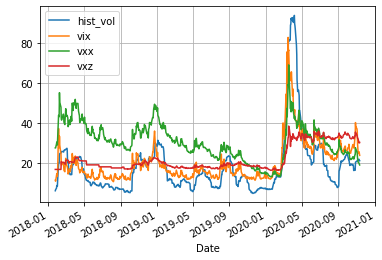

In [7]:
df.plot()
plt.grid(True)
print("plot the volatilities through time.")